# Prediction of ticket fares by age using LinearRegression in Titanic dataset

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='fare'>

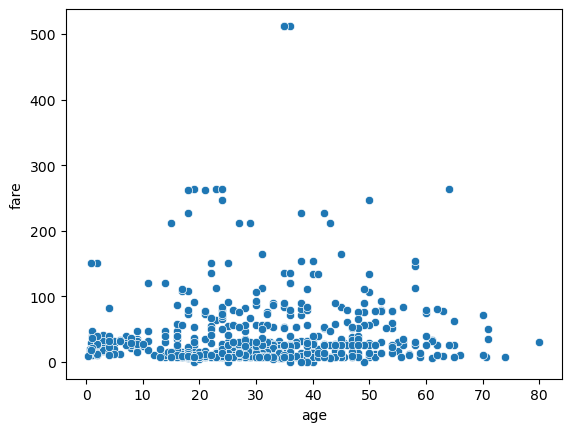

In [3]:
df = df[['age', 'fare']].dropna()
sns.scatterplot(x='age', y='fare', data=df)

In [4]:
X = df.drop(columns ="fare") #df[["TV", "radio", "newspaper"]]
y = df["fare"]

In [5]:
# X = df[['age']]
# y = df['fare']
Xtr, Xts, ytr, yts = tts(X, y, test_size=.3, random_state=0)

In [6]:
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((499, 1), (215, 1), (499,), (215,))

In [7]:
_ = LR()
_.fit(Xtr, ytr)

LinearRegression()

In [8]:
y_pred = _.predict(Xts)
y_pred

array([34.64908427, 40.82315271, 27.0493673 , 36.89420007, 34.08780532,
       36.89420007, 35.4910027 , 45.03274484, 45.03274484, 39.98123429,
       32.96524742, 34.08780532, 27.91373688, 37.73611849, 32.68460795,
       42.22635009, 36.05228164, 27.00165859, 33.52652637, 37.73611849,
       32.40396847, 38.01675797, 30.72013163, 34.92972375, 35.21036322,
       27.00165859, 36.89420007, 32.68460795, 34.3684448 , 38.01675797,
       35.77164217, 27.35245793, 32.40396847, 41.38443166, 36.61356059,
       38.57803692, 37.45547902, 36.89420007, 32.40396847, 31.0007711 ,
       32.96524742, 32.68460795, 38.57803692, 32.68460795, 34.64908427,
       28.19437635, 27.6330974 , 33.52652637, 36.61356059, 34.64908427,
       37.45547902, 33.52652637, 33.80716585, 35.77164217, 42.78762904,
       33.80716585, 30.43949215, 33.80716585, 44.19082641, 38.57803692,
       37.45547902, 41.10379219, 34.08780532, 32.40396847, 31.28141057,
       34.92972375, 38.01675797, 36.61356059, 27.35245793, 33.24

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
print(f'mae      = {mean_absolute_error(yts, y_pred):>10.2f}')
print(f'mse      = {mean_squared_error(yts, y_pred):>10.2f}')
print(f'rmse     = {root_mean_squared_error(yts, y_pred):>10.2f}')
print(f'r2 score = {r2_score(yts, y_pred):>10.2f}')

mae      =      29.34
mse      =    1788.82
rmse     =      42.29
r2 score =       0.02


In [10]:
_.intercept_

26.79117897957144

In [11]:
_.coef_

array([0.28063947])

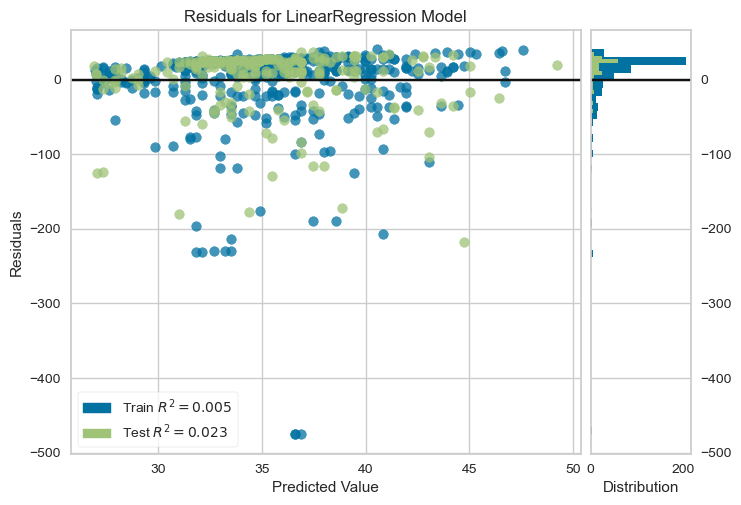

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
from yellowbrick.regressor import ResidualsPlot as RP
viz=RP(LR())
viz.fit(Xtr, ytr)
viz.score(Xts, yts)
viz.show()